In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

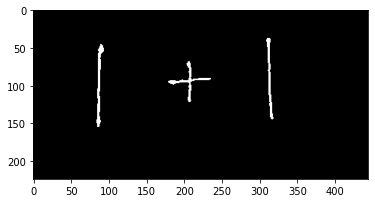

In [28]:
img = cv2.imread('test5.jpeg', cv2.IMREAD_GRAYSCALE)
_,thres = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thres, cmap='gray')
plt.show()

In [29]:
cntr,_ = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(cntr)

3

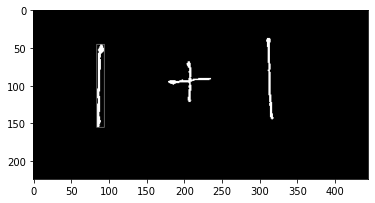

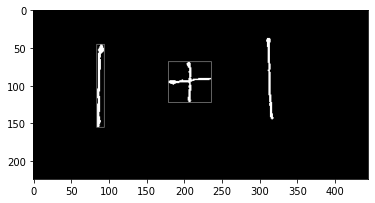

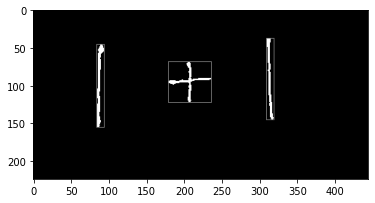

In [30]:
cnt=sorted(cntr, key=lambda cntr: cv2.boundingRect(cntr)[0])
for i in cnt:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(thres, (x,y), (x+w, y+h), (125,125,125), 1)
    plt.imshow(thres, cmap='gray')
    plt.show()

In [203]:
im_crop = thres[y:y+h, x:x+w]
im_crop = cv2.resize(im_crop, (28,28))

In [204]:
myImg = np.reshape(im_crop, (1,28,28,1))/255
myImg.shape

(1, 28, 28, 1)

In [205]:
from keras.models import load_model
myModel = load_model('trained.h5')

In [206]:
val = np.argmax(myModel.predict(myImg))
str(val)

'7'

In [145]:
s = '1'+'2'+'+'+'3'
eval(s)

15

In [18]:
def getTheArray(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    _,thres = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV)
    cntr,_ = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(cntr, key=lambda cntr: cv2.boundingRect(cntr)[0])
    
    rect = []
    for i in cnt:
        x,y,w,h = cv2.boundingRect(i)
        rect.append([x,y,w,h])
    
    allChar = []
    for rec in rect:
        x,y,w,h = rec
        im_crop = thres[y:y+h, x:x+w]
        im_crop = cv2.resize(im_crop, (28,28))
        finalImg = np.reshape(im_crop, (1,28,28,1))/255
        allChar.append(finalImg)
    
    return allChar

In [19]:
def getTheEquation(elements, cnnModel):
    s = ''
    for ele in elements:
        prediction = np.argmax(cnnModel.predict(ele))
        if(prediction == 10) : s += '-'
        elif(prediction == 11) :s += '+'
        elif(prediction == 12) : s += '*'
        else : s += str(prediction)
    
    return s

In [31]:
from keras.models import load_model
arr = getTheArray('test5.jpeg')
cnnModel = load_model('trained.h5')

s = getTheEquation(arr, cnnModel)
print(s, eval(s))
len(arr)

8+8 16


3

In [164]:
np.argmax(cnnModel.predict(arr[0]))

8